In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(2)

In [388]:
data = pd.read_csv(r"C:\Users\rites\Downloads\Credit-Card-Fraud\Dataset\creditcard.csv")

In [389]:
## data exploration

data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [390]:
## Data preprocessing

In [391]:
from sklearn.preprocessing import StandardScaler

In [392]:
data['normalized_amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis = 1)

In [393]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [394]:
data = data.drop(['Time'], axis = 1)

In [395]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [396]:
x = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [397]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [398]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [399]:
from sklearn.model_selection import train_test_split

In [400]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [401]:
x_test.shape, x_train.shape

((85443, 29), (199364, 29))

In [402]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [403]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [404]:
model = Sequential([
    Dense(units = 16, input_dim = 29, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dropout(0.5),
    Dense(20 , activation = 'relu'),
    Dense(24 , activation = 'relu'),
    Dense(1, activation = 'sigmoid'),
])

In [405]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_52 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_11 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 20)                500       
_________________________________________________________________
dense_54 (Dense)             (None, 24)                504       
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [406]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [407]:
model.fit(x_train, y_train, batch_size = 15, epochs = 5)

Epoch 1/5
199364/199364 [==============================] - 18s 88us/step - loss: 0.0100 - acc: 0.9979
Epoch 2/5
199364/199364 [==============================] - 18s 89us/step - loss: 0.0039 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 18s 90us/step - loss: 0.0035 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 18s 90us/step - loss: 0.0034 - acc: 0.9993
Epoch 5/5
199364/199364 [==============================] - 17s 86us/step - loss: 0.0032 - acc: 0.9994


In [408]:
score = model.evaluate(x_test, y_test)

85443/85443 [==============================] - 2s 27us/step


In [409]:
score

[0.004580730436287139, 0.9993914071369217]

In [410]:
print('Test accuracy : ', score[1])

Test accuracy :  0.9993914071369217


In [411]:
y_pred = model.predict(x_test)
y_test = pd.DataFrame(y_test)

In [412]:
from sklearn.metrics import confusion_matrix

In [413]:
cm = confusion_matrix(y_test, y_pred.round())

array([[85279,    17],
       [   35,   112]], dtype=int64)

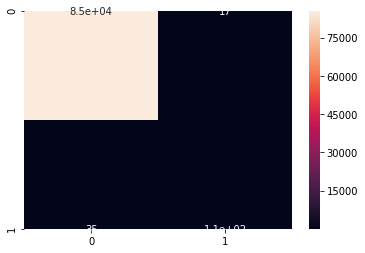

In [414]:
sns.heatmap(cm, annot = True)
cm

In [415]:
y_predicted = model.predict(x)
y_expected = pd.DataFrame(y)


In [416]:
cm_new = confusion_matrix(y_expected, y_predicted.round())

In [417]:
cm_new

array([[284257,     58],
       [   124,    368]], dtype=int64)

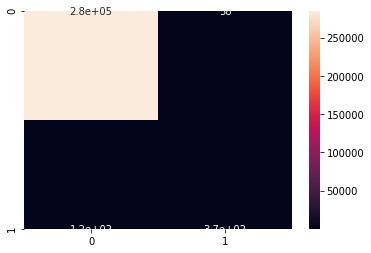

In [418]:
sns.heatmap(cm_new , annot = True)

## Under Sampling

## Over Sampling

In [419]:
from imblearn.over_sampling import SMOTE

In [420]:
x_resample, y_resample = SMOTE().fit_sample(x,y.values.ravel())

In [421]:
x_resample = pd.DataFrame(x_resample)
y_resample = pd.DataFrame(y_resample)

In [422]:
x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.3, random_state = 0)

In [423]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [424]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 15 , epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 37s 92us/step - loss: 0.0355 - acc: 0.9881
Epoch 2/5
398041/398041 [==============================] - 39s 98us/step - loss: 0.0149 - acc: 0.9960
Epoch 3/5
398041/398041 [==============================] - 36s 89us/step - loss: 0.0124 - acc: 0.9969
Epoch 4/5
398041/398041 [==============================] - 35s 89us/step - loss: 0.0109 - acc: 0.9974
Epoch 5/5
398041/398041 [==============================] - 35s 87us/step - loss: 0.0098 - acc: 0.9977


In [425]:
y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred)
cm_new_os = confusion_matrix(y_test, y_pred.values.round())

[[84895   277]
 [   25 85392]]


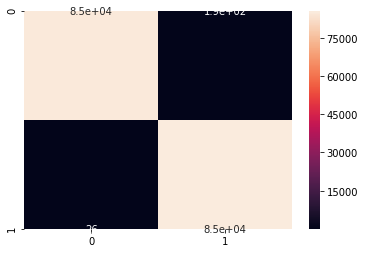

In [426]:
sns.heatmap(cm_new_as, annot = True)
print(cm_new_os)

In [427]:
from sklearn.metrics import classification_report

In [428]:
num_classes = 2
target_names = ['Class-{}'.format(i) for i in range(num_classes)]

print(classification_report(y_test, y_pred.values.round(), target_names = target_names))

              precision    recall  f1-score   support

     Class-0       1.00      1.00      1.00     85172
     Class-1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

